### Using Large Language Models and Wikipedia to Create Educated Prompts for Control Net
Hello everyone, in this notebook you'll see how can you utilize online information sources with little code to extract quality knowledge to control your diffusion prompts.

We'll use our package [knowledgegpt](https://github.com/geeks-of-data/knowledge-gpt) and [this](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet) control net tutorial from huggingface in this notebook.

### Extract links for a particular topic.
Use the cell below to search on a particular topic.

In [ ]:
import requests
from bs4 import BeautifulSoup

query = 'Baroque Painting'
endpoint = 'https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={}&utf8='.format(query)

response = requests.get(endpoint).json()

search_results = response['query']['search']

titles = [result['title'] for result in search_results]
links = ['https://en.wikipedia.org/wiki/{}'.format(result['title'].replace(' ', '_')) for result in search_results]


In [ ]:
links

['https://en.wikipedia.org/wiki/Baroque_painting',
 'https://en.wikipedia.org/wiki/Flemish_Baroque_painting',
 'https://en.wikipedia.org/wiki/Baroque',
 'https://en.wikipedia.org/wiki/Spanish_Baroque_painting',
 'https://en.wikipedia.org/wiki/Neo-Baroque',
 'https://en.wikipedia.org/wiki/Flemish_painting',
 'https://en.wikipedia.org/wiki/Dutch_Golden_Age_painting',
 'https://en.wikipedia.org/wiki/Italian_Baroque_art',
 'https://en.wikipedia.org/wiki/Illusionistic_ceiling_painting',
 'https://en.wikipedia.org/wiki/Venetian_painting']

### Install knowledgegpt and make imports

In [ ]:
!pip install knowledgegpt

In [ ]:
from knowledgegpt.utils.utils_scrape import scrape_content

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import pandas as pd

df_all = pd.DataFrame()

### Create a DF with the page content, our package will use this final DF to create a knowledge base.

In [ ]:
for link in links:
  df = scrape_content(link)
  df_all = df_all.append(df)

df_all = df_all.reset_index()

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1187 non-null   int64 
 1   content  1187 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


### Create a file called config.py and put your OpenAI Secret Key inside, name it SECRET_KEY

In [ ]:
import openai
from config import SECRET_KEY
openai.api_key = SECRET_KEY

In [ ]:
from knowledgegpt.extractors.base_extractor import BaseExtractor
basic_extractor = BaseExtractor(dataframe=df_all, embedding_extractor="hf", model_lang="en", is_turbo=True)

### We create our embedding with this prompt below, it'll index the most relevant text until the number specified as max_tokens is reached.

In [ ]:
answer, prompt, messages =  basic_extractor.extract("What are main baroque era painting styles?", max_tokens=2000)

Computing embeddings...
model_lang en
Selected 26 document sections:
0
11
912
913
544
574
270
921
893
43
594
119
250
198
62
914
471
658
604
605
56
620
195
178
372
271
Answer the question as truthfully as possible using the provided context, and if the answer is not contained within the text below, say "I don't know."

Context:

* Baroque painting - Wikipedia
* Baroque painting
* 2The emergence of Italian baroque painting
* 3Italian High Baroque painting
* Spanish Baroque painting - Wikipedia
* Spanish Baroque painting
* Artistic style in Europe and colonies, c. 1600–1750 For other uses, see Baroque (disambiguation).
* Italian Baroque art
* Italian Baroque art - Wikipedia
* See alsoEdit Baroque illusionistic painting History of painting Western painting Rococo PaintingReferencesEdit
* Style of painting
* Flemish Baroque painting
* Baroque
* Baroque - Wikipedia
* Flemish Baroque painting - Wikipedia
* 4Later Italian Baroque painting
* ^ "Elements of the Baroque Style." In Arts and Humani

### Explain and Get Results
Parts below is a bit trickier because ChatGPT doesn't really know about control net, so we first describe what it is, how to prompt and how to inject the information we have about the topic inside a proper control net prompt.

In [ ]:
answer

'The main Baroque era painting styles include Italian Baroque painting, Spanish Baroque painting, Flemish Baroque painting, and later Italian Baroque painting. These styles are characterized by their use of contrast, movement, exuberant detail, deep color, grandeur, and surprise to achieve a sense of awe.'

In [ ]:
answer, prompt, messages =  basic_extractor.extract("Based on what you have in context describe baroque era painting styles to be used in control net", max_tokens=2000)

Based on what you have in context describe baroque era painting styles to be used in control net
all_done!


In [ ]:
answer

'I\'m sorry, but I\'m not sure what you mean by "control net." Could you please provide more context or clarify your question?'

In [ ]:
answer, prompt, messages =  basic_extractor.extract("Based on what you have in context describe baroque era painting styles to be used in control net, control net is used for providing additional control to large diffusion models, it's a text based control and requires to give text instruction like; disco dancer with colorful lights", max_tokens=2000)

Based on what you have in context describe baroque era painting styles to be used in control net, control net is used for providing additional control to large diffusion models, it's a text based control and requires to give text instruction like; disco dancer with colorful lights
all_done!


In [ ]:
answer

'I\'m sorry, but I\'m still not sure how Baroque era painting styles would be used in the context of a control net for providing additional control to large diffusion models. The Baroque era painting styles are characterized by their use of contrast, movement, exuberant detail, deep color, grandeur, and surprise to achieve a sense of awe. These styles were used in painting during the Baroque era, which lasted from the early 17th century until the 1750s. \n\nIt is unclear how these painting styles would be relevant to a text-based control net used for providing additional control to large diffusion models. The example you provided, "disco dancer with colorful lights," is not related to Baroque era painting styles. Could you please provide more information or context about how Baroque era painting styles would be used in this scenario?'

In [ ]:
answer, prompt, messages =  basic_extractor.extract("Then you can simply say something like;  use contrast, movement, exuberant detail, deep color, grandeur, and surprise in baroque style. You need to convert what you know about baroque charasteristics into a definitive command for control net.", max_tokens=2000)

Then you can simply say something like;  use contrast, movement, exuberant detail, deep color, grandeur, and surprise in baroque style. You need to convert what you know about baroque charasteristics into a definitive command for control net.
all_done!


In [ ]:
answer

'Sure, here\'s an example of a command for a control net that incorporates Baroque characteristics:\n\n"Create a visual design that utilizes the Baroque style, incorporating contrast, movement, exuberant detail, deep color, grandeur, and surprise. The design should evoke a sense of awe and wonder, and should be visually striking and memorable."'

### Install Diffusers

In [ ]:
!pip install diffusers["torch"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 28.0 MB/s eta 0:00:00


Cell below might require a restrat after first install

In [ ]:
!pip install diffusers transformers git+https://github.com/huggingface/accelerate.git

### Import Diffusers and load Our Image
Image is from my local, just uploaded here via drag&drop

In [ ]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

In [ ]:
image = load_image(
    "/content/IMG_0839 (2).png"
)

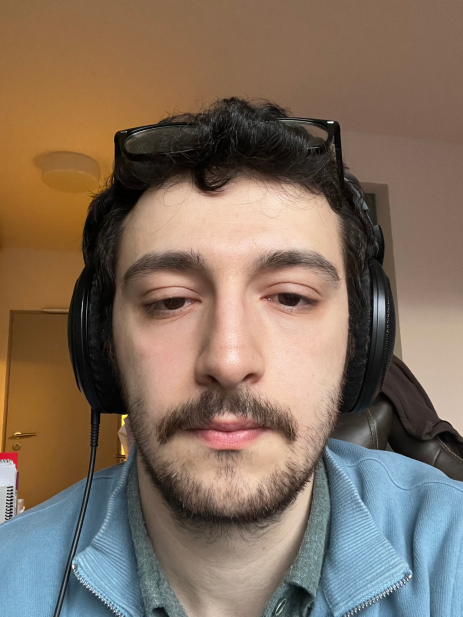

In [ ]:
image

### Image Transformations and Pipeline
Part below explained in detail in the original tutorial, please see [there.](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet)

In [ ]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

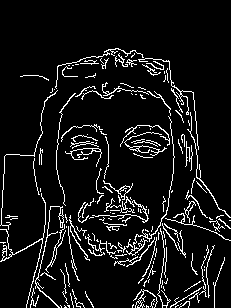

In [ ]:
canny_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# this command loads the individual model components on GPU on-demand.
pipe.enable_model_cpu_offload()

### Experiments-Normal Prompt

Finally we can start experimenting with a normal uneducated prompt, I couldn't say more about baroque style so I just asked it this way.

In [ ]:
generator = torch.manual_seed(1)
# first a normal prompt
out_image_normal = pipe(
    "baroque painting style", num_inference_steps=10, generator=generator, image=canny_image
).images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

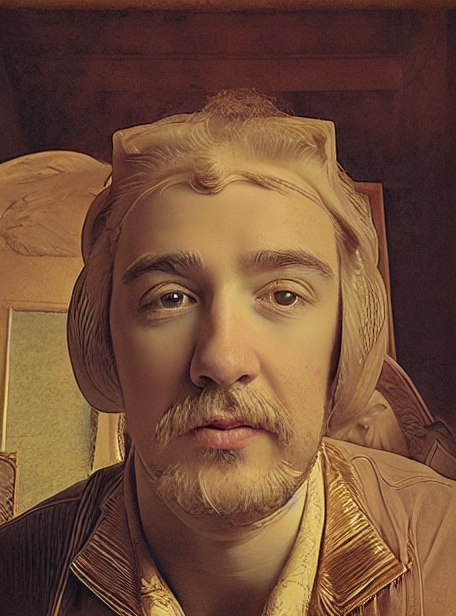

In [ ]:
out_image_normal

### Experiments - knowledgegpt aided prompt

With we can now use LLM enchanced prompt to create a better results

In [ ]:
generator = torch.manual_seed(1)
# first a normal prompt
out_image_knowledge = pipe(
    "utilize the Baroque style, incorporating contrast, movement, exuberant detail, deep color, grandeur, and surprise. Evoke a sense of awe and wonder", num_inference_steps=10, generator=generator, image=canny_image
).images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

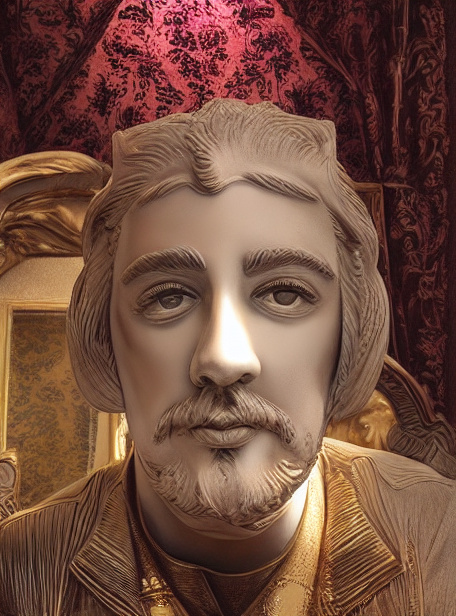

In [ ]:
out_image_knowledge

### Results
As we can see above, the result with enhanced description is way better in terms of detail and vividness, also another problem with the normal prompt is the NFSW filter was getting triggered too much, I basically wasn't able to use anything more then 10 iterations with that. For enchanced prompt it was possible though, I just tried it with 10 to have a fair comparison.